Agents In Teams - Round Robin Group Chat

In [47]:
import asyncio
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
import os

load_dotenv()
api_key= os.getenv("OPENAI_API_KEY")
model_client = OpenAIChatCompletionClient(model="gpt-3.5-turbo", api_key=api_key)

python-dotenv could not parse statement starting at line 5
python-dotenv could not parse statement starting at line 6


In [48]:
from autogen_agentchat.agents import AssistantAgent

dsa_solver = AssistantAgent(
    name = 'Complex_DSA_Solver',
    model_client=model_client,
    description='A DSA solver',
    system_message="You give code in python to solve complex DSA problems. Give under 100 words"
)

code_reviewer = AssistantAgent(
    name = 'CODE_REVEIWER',
    model_client=model_client,
    description='A Code Reviewer',
    system_message="You review the code given by the complex_dsa_solver and make sure it is optimized.Give under 10 words.If you fell it is fine,please say 'TERMINATE'."
)

code_editor = AssistantAgent(
    name = 'CODE_EDITOR',
    model_client=model_client,
    description='A Code editor',
    system_message="You make the code easy to understand and add comments wherever required.Give under 10 words"
)

In [49]:
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.conditions import TextMentionTermination

my_termination=TextMentionTermination(text='TERMINATE')

team = RoundRobinGroupChat(
    participants=[dsa_solver, code_reviewer, code_editor],
    termination_condition = my_termination,
    max_turns=15,
)

In [ ]:
async def run_team():
    task = TextMessage(content='Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.Youmay assume that each input would have exactly one solution, and you may not use the same element twice.Y',source='User')

    result= await team.run(task=task)

    for each_agent_message in result.messages:
        print(f"{each_agent_message.source}: {each_agent_message.content}")
    

await run_team()


User: Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.You may assume that each input would have exactly one solution, and you may not use the same element twice.Y
Complex_DSA_Solver: def two_sum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        else:
            seen[num] = i

# Example usage:
nums = [2, 7, 11, 15]
target = 9
print(two_sum(nums, target)) # Output: [0, 1]
CODE_REVEIWER: OPTIMIZE
CODE_EDITOR: Use a dictionary to keep track of numbers encountered.
Complex_DSA_Solver: def two_sum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        else:
            seen[num] = i

# Example usage:
nums = [2, 7, 11, 15]
target = 9
print(two_sum(nums, target)) # Output: [

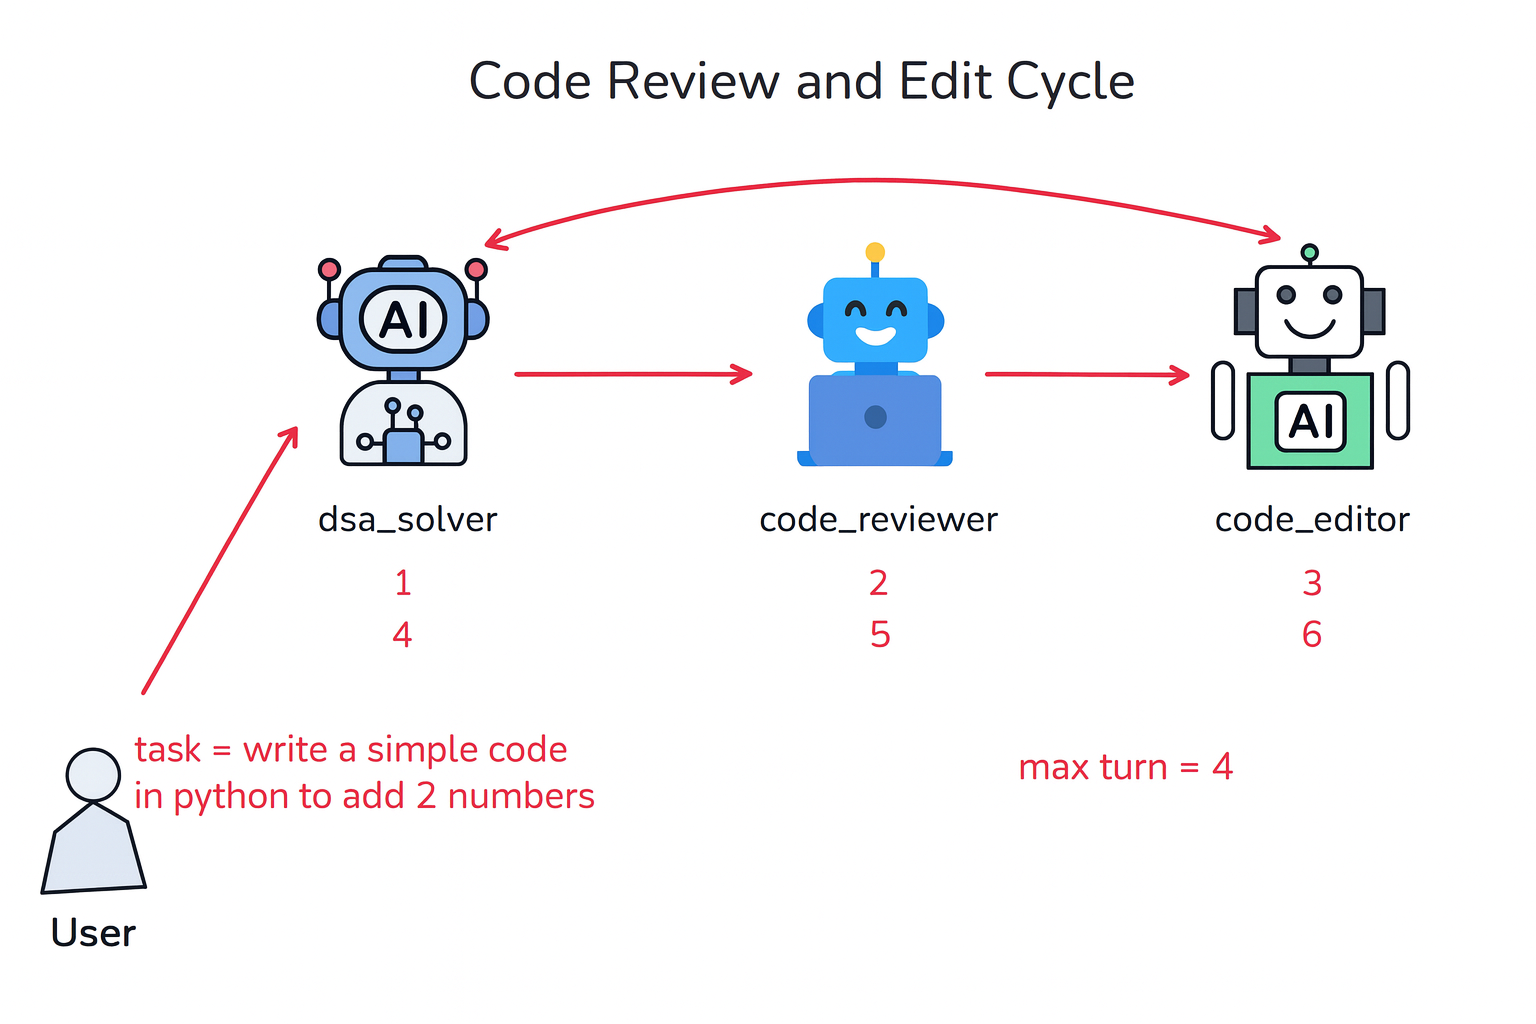